In [376]:
from __future__ import print_function, division

import pandas as pd
import geopandas as gpd
import fiona
import shapely
import choroplethNYC

pd.options.display.max_columns = 999

import pylab as pl
#%pylab inline

# Tree Counts and Perceived Safety

In [377]:
ss = pd.read_csv('data/streetscore_newyorkcity.csv')
ts = pd.read_csv('data/2015_Street_Tree_Census_-_Tree_Data.csv')

In [378]:
ss.head()

,latitude,longitude,q-score
0,40.700909,-74.013504,11.062166
1,40.701000,-74.013878,10.818611
2,40.701080,-74.012878,12.677955
3,40.701187,-74.013268,11.417325
4,40.701244,-74.012115,25.199091


In [379]:
ts.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260


## Geojson of NYC blocks

In [380]:
blocks = gpd.GeoDataFrame.from_file("data/2010 Census Blocks.geojson")

In [381]:
# Number of NYC blocks
len(blocks)

38794

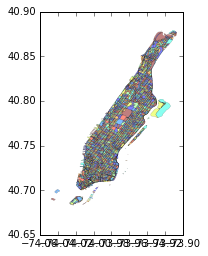

In [382]:
blocks[blocks.boro_name=='Manhattan'].plot(linewidth=0.1)

## Creating points for each tree

In [383]:
ts.dropna(axis=0, subset=['latitude','longitude'], inplace=True)
ts['lonlat'] = zip(ts.longitude, ts.latitude)
ts['geometry'] = ts[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [384]:
#Adding coordinate reference system to each dataframe
ts.crs = {'init': 'epsg:4326'}
blocks.crs = {'init': 'epsg:4326'}
ss.crs = {'init': 'epsg:4326'}

In [385]:
ts.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,lonlat,geometry
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,"(-73.84421522, 40.72309177)",POINT (-73.84421522 40.72309177)
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,"(-73.81867946, 40.79411067)",POINT (-73.81867946 40.79411067)
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,"(-73.9366077, 40.71758074)",POINT (-73.93660770000001 40.71758074)
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,"(-73.93445616, 40.71353749)",POINT (-73.93445616 40.71353749)
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,"(-73.97597938, 40.66677776)",POINT (-73.97597938 40.66677776)


In [386]:
# Number of NYC trees
len(ts)

683788

## Join trees onto block polygons

In [387]:
trees_within_blocks = gpd.sjoin(ts, blocks, how="inner", op='within')

In [388]:
# Number of trees per block
tree_count = trees_within_blocks.groupby('bctcb_2010')['tree_id'].count().to_frame()

In [389]:
tree_count.head()

,tree_id
bctcb_2010,
10002011000,10
10002011001,28
10002012000,2
10002012001,30
10002021000,7


In [390]:
trees_block = pd.merge(trees_within_blocks, tree_count, how='left', left_on='bctcb_2010', right_index=True, suffixes=('_', '_y'))

## Creating points for each MIT street score

In [391]:
ss.dropna(axis=0, subset=['latitude','longitude'], inplace=True)
ss['lonlat'] = zip(ss.longitude, ss.latitude)
ss['geometry'] = ss[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [392]:
scores_within_blocks = gpd.sjoin(ss, blocks, how="inner", op='within')

In [393]:
# Finding median MIT score for each block
score_by_block = scores_within_blocks.groupby('bctcb_2010')['q-score'].median().to_frame()

In [394]:
score_by_block.head()

,q-score
bctcb_2010,
10002011000,31.161489
10002011001,22.838888
10002012000,25.675308
10002012001,23.598220
10002012002,29.116226


## Joining MIT score onto tree + block dataframe

In [395]:
trees_block_score = pd.merge(trees_block, score_by_block, how='left', left_on='bctcb_2010', right_index=True, suffixes=('_trees', '_score'))
trees_block_score.rename(columns={'tree_id_y':'tree_count','q-score':'q_score'},inplace=True)

In [396]:
no_dup = trees_block_score[['boro_name','zipcode','nta_name','bctcb_2010','tree_count','q_score']].drop_duplicates()
no_dup.dropna(inplace=True)
no_dup.head()

,boro_name,zipcode,nta_name,bctcb_2010,tree_count,q_score
604928,Staten Island,10301,West New Brighton-New Brighton-St. George,50009001000,30,26.654669
187281,Staten Island,10305,Stapleton-Rosebank,50020011000,21,24.946515
228187,Staten Island,10304,Stapleton-Rosebank,50027001000,13,22.282650
161121,Staten Island,10304,Grymes Hill-Clifton-Fox Hills,50040001000,19,22.888495
203577,Staten Island,10305,Grasmere-Arrochar-Ft. Wadsworth,50064001000,12,23.437673


In [397]:
by_zip = no_dup.groupby('zipcode')['tree_count'].mean()

## Correlation between perceived safety and tree count

In [398]:
from scipy.stats import pearsonr

pearsonr(no_dup['tree_count'].astype(float),no_dup['q_score'])

(0.22322704989148948, 0.0)

In [399]:
boros = no_dup.boro_name.unique()
for boro in boros:
    boro_df = no_dup[no_dup.boro_name==boro]
    corr = pearsonr(boro_df['tree_count'],boro_df['q_score'])
    print('{}: {}'.format(boro,corr[0]))

Staten Island: 0.130123841006
Manhattan: 0.206062111525
Brooklyn: 0.295731955387
Bronx: 0.154347865576
Queens: 0.289086016389


## Investigating by zip code

In [400]:
zipcodes = no_dup.zipcode.unique()

In [401]:
corr_by_zip = pd.DataFrame.from_dict({zipcode: pearsonr(no_dup[no_dup.zipcode == zipcode]['tree_count'],no_dup[no_dup.zipcode == zipcode]['q_score'])[0] for zipcode in zipcodes},orient='index').rename(columns={0:'corr'})
trees_by_zip = no_dup.groupby('zipcode')['tree_count'].mean().to_frame()
corr_trees_by_zip = pd.concat([corr_by_zip,trees_by_zip], axis=1)

In [402]:
corr_trees_by_zip.head()

,corr,tree_count
83,-0.449244,50.400000
10001,-0.313848,15.101449
10002,0.006931,13.852761
10003,0.184699,20.400000
10004,0.152990,9.909091


In [403]:
# Merge zip code level data with overall tree dataframe
trees_zip = pd.merge(no_dup, corr_trees_by_zip, how='left', left_on='zipcode', right_index=True, suffixes=('', '_by_zip'))

In [404]:
trees_zip.head()

,boro_name,zipcode,nta_name,bctcb_2010,tree_count,q_score,corr,tree_count_by_zip
604928,Staten Island,10301,West New Brighton-New Brighton-St. George,50009001000,30,26.654669,0.157839,21.426573
187281,Staten Island,10305,Stapleton-Rosebank,50020011000,21,24.946515,0.083168,18.391076
228187,Staten Island,10304,Stapleton-Rosebank,50027001000,13,22.282650,0.107697,19.573718
161121,Staten Island,10304,Grymes Hill-Clifton-Fox Hills,50040001000,19,22.888495,0.107697,19.573718
203577,Staten Island,10305,Grasmere-Arrochar-Ft. Wadsworth,50064001000,12,23.437673,0.083168,18.391076


In [405]:
zip_mean_score = no_dup.groupby('zipcode')['q_score'].mean().to_frame()
score_tree_zip = pd.merge(trees_zip, zip_score, how='left', left_on='zipcode', right_index=True, suffixes=('', '_by_zip'))

In [406]:
score_tree_zip

,boro_name,zipcode,nta_name,bctcb_2010,tree_count,q_score,corr,tree_count_by_zip,q_score_by_zip
604928,Staten Island,10301,West New Brighton-New Brighton-St. George,50009001000,30,26.654669,0.157839,21.426573,24.930318
187281,Staten Island,10305,Stapleton-Rosebank,50020011000,21,24.946515,0.083168,18.391076,23.725939
228187,Staten Island,10304,Stapleton-Rosebank,50027001000,13,22.282650,0.107697,19.573718,25.101966
161121,Staten Island,10304,Grymes Hill-Clifton-Fox Hills,50040001000,19,22.888495,0.107697,19.573718,25.101966
203577,Staten Island,10305,Grasmere-Arrochar-Ft. Wadsworth,50064001000,12,23.437673,0.083168,18.391076,23.725939
235790,Staten Island,10305,Grasmere-Arrochar-Ft. Wadsworth,50074001000,17,23.507214,0.083168,18.391076,23.725939
215598,Staten Island,10301,New Brighton-Silver Lake,50075001000,3,25.104774,0.157839,21.426573,24.930318
116291,Staten Island,10301,West New Brighton-New Brighton-St. George,50077001000,23,20.963943,0.157839,21.426573,24.930318
273153,Staten Island,10305,Old Town-Dongan Hills-South Beach,50112011000,11,24.022928,0.083168,18.391076,23.725939
247117,Staten Island,10306,New Dorp-Midland Beach,50112021000,6,21.741388,0.158706,21.540453,24.854738


In [407]:
by_zip = score_tree_zip[['zipcode','tree_count_by_zip','q_score_by_zip','corr']].drop_duplicates().reset_index()
by_zip.head()

,index,zipcode,tree_count_by_zip,q_score_by_zip,corr
0,604928,10301,21.426573,24.930318,0.157839
1,187281,10305,18.391076,23.725939,0.083168
2,228187,10304,19.573718,25.101966,0.107697
3,247117,10306,21.540453,24.854738,0.158706
4,86345,10310,17.317536,24.527829,0.104470


## Import NYC shapefile

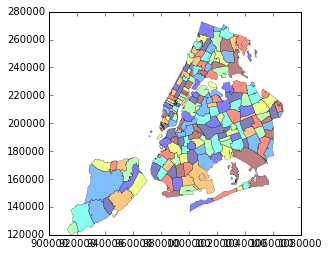

In [408]:
zip_map = gpd.read_file('data/ZIP_CODE_040114/ZIP_CODE_040114.shp')
zip_map['zipcode'] = zip_map['ZIPCODE'].apply(lambda x: int(x))
zip_map.plot(linewidth=0.2)

In [409]:
# Merge shapefile with count/q_score/correlation dataframe
overall = gpd.GeoDataFrame(pd.merge(by_zip, zip_map, how='left', on='zipcode', suffixes=('_factors', '')))

## Exploratory Plotting

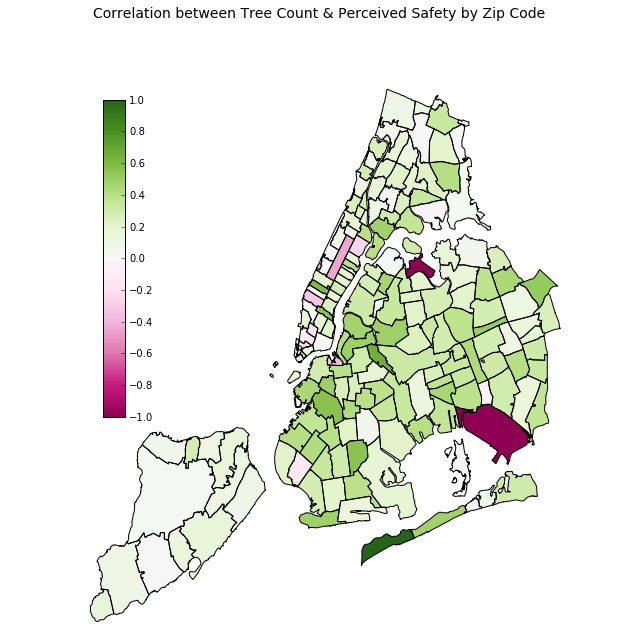

In [410]:
import choroplethNYC as cp

## Looking at correlation plotted by zip
fig3, ax3, cb3 = cp.choroplethNYC(overall, "corr", cmap="PiYG", cb=True)
fig3.suptitle('Correlation between Tree Count & Perceived Safety by Zip Code', fontsize=14)

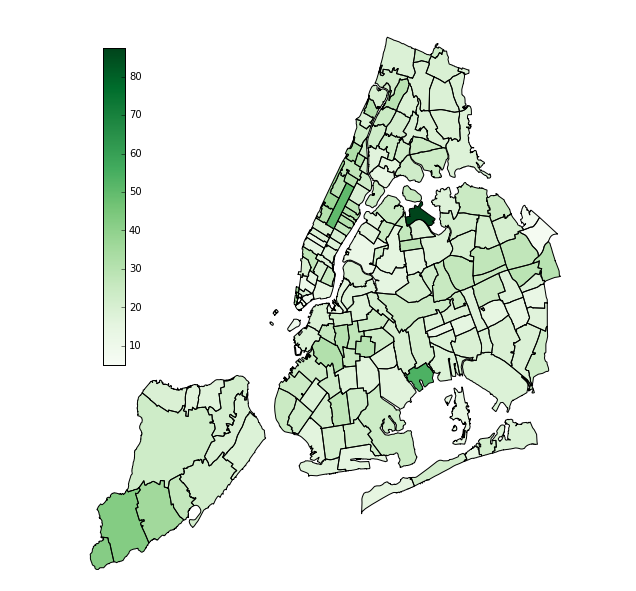

In [411]:
# Looking at tree count per block for each zip code
fig, ax, cb = cp.choroplethNYC(overall, "tree_count_by_zip", cmap="Greens", cb=True)

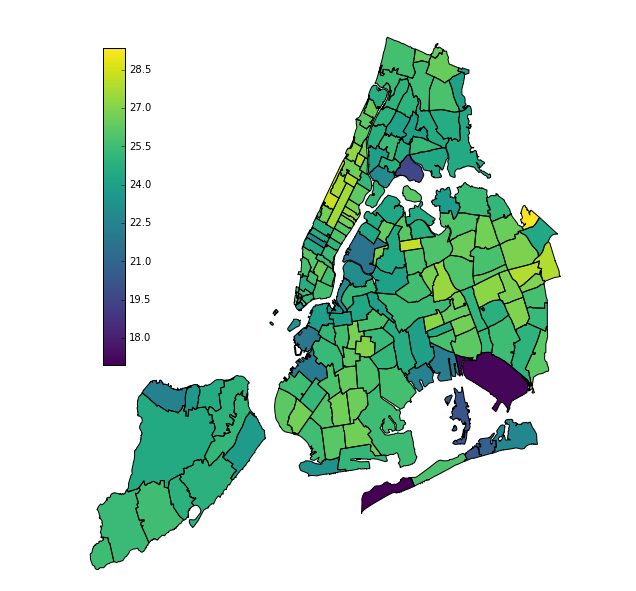

In [412]:
# Looking at average q_score for each zip code
fig, ax, cb = cp.choroplethNYC(overall, "q_score_by_zip", cmap="viridis", cb=True)

It's curious to me how there are clear outliers in the dataset particularly for tree count by block. In order to get a more accurate picture of the relationship between tree count and perceived satety, I'm going to remove data points more than 3 standard deviations from the mean for each metric.

## Exclude outliers and final plots

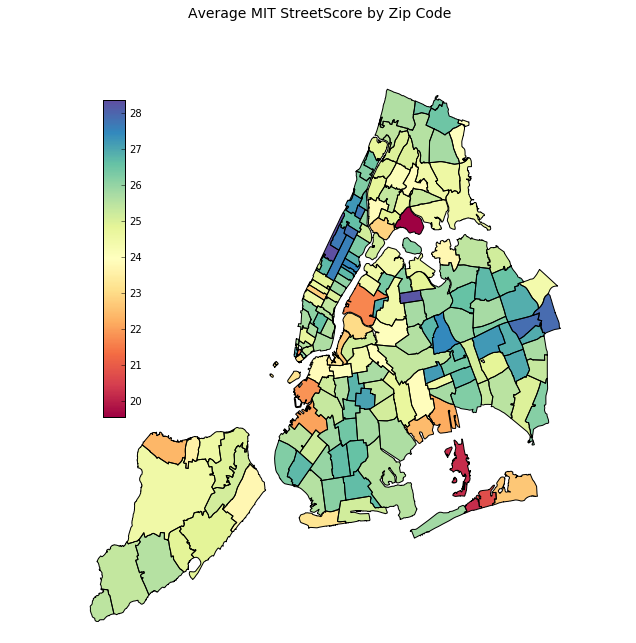

In [413]:
q_norm = overall[np.abs(overall.q_score_by_zip-overall.q_score_by_zip.mean())<=(3*overall.q_score_by_zip.std())].dropna()
fig, ax, cb = cp.choroplethNYC(q_norm, "q_score_by_zip", cmap="Spectral", cb=True)
fig.suptitle('Average MIT StreetScore by Zip Code', fontsize=14)

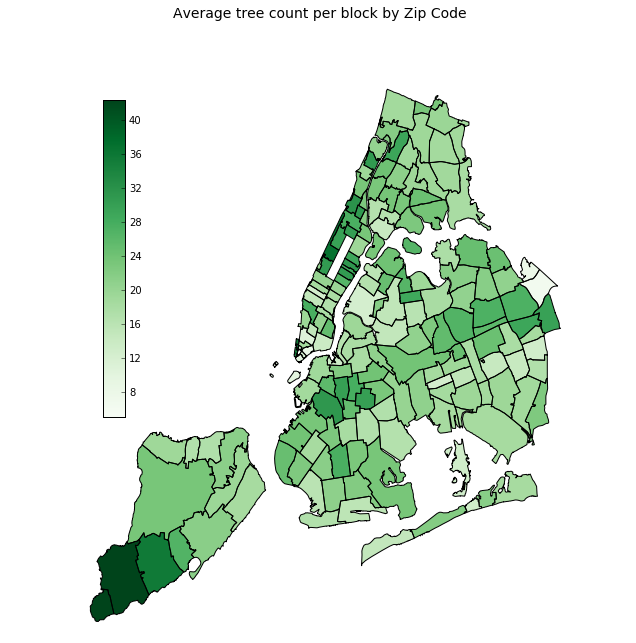

In [414]:
tree_norm = overall[np.abs(overall.tree_count_by_zip-overall.tree_count_by_zip.mean())<=(3*overall.tree_count_by_zip.std())]
fig_two, ax_two, cb_two = cp.choroplethNYC(tree_norm, "tree_count_by_zip", cmap="Greens", cb=True)
fig_two.suptitle('Average tree count per block by Zip Code', fontsize=14)